# Imports and Data Inspection 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import spacy 
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer 

In [6]:
metadata = pd.read_csv('../data/music_dataset_1950-2019.csv')

In [7]:
metadata.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28372 non-null  object 
 1   track_name                28372 non-null  object 
 2   release_date              28372 non-null  int64  
 3   genre                     28372 non-null  object 
 4   lyrics                    28372 non-null  object 
 5   len                       28372 non-null  int64  
 6   dating                    28372 non-null  float64
 7   violence                  28372 non-null  float64
 8   world/life                28372 non-null  float64
 9   night/time                28372 non-null  float64
 10  shake the audience        28372 non-null  float64
 11  family/gospel             28372 non-null  float64
 12  romantic                  28372 non-null  float64
 13  communication             28372 non-null  float64
 14  obscen

# Processing lyric data with SpaCy
Creating a spacy function to use with .apply() to apply the spacy preprocessing pipeline to a whole column in a dataframe - removing stop words, punctuation, digits, making sure there are no single letters or characters, keeping alphabetical words only, tokenizing and lemmtizing. 


In [9]:
nlp = spacy.load('en_core_web_md')

In [10]:
def spacy_preprocessor(text): 
    doc = nlp(text) 
    tokens = [token.lemma_.lower().strip() for token in doc if token.is_alpha and not token.is_stop and not token.is_punct and len(token.text) > 1]
    processed_text = ' '.join(tokens)
    return processed_text 

In [11]:
metadata['processed_lyrics'] = metadata['lyrics'].apply(spacy_preprocessor)

In [12]:
print(metadata['genre'].unique())
print(metadata['genre'].value_counts(normalize = True))
print(metadata['genre'].value_counts())

['pop' 'country' 'blues' 'jazz' 'reggae' 'rock' 'hip hop']
genre
pop        0.248202
country    0.191915
blues      0.162273
rock       0.142182
jazz       0.135521
reggae     0.088045
hip hop    0.031862
Name: proportion, dtype: float64
genre
pop        7042
country    5445
blues      4604
rock       4034
jazz       3845
reggae     2498
hip hop     904
Name: count, dtype: int64


Noting for classification models that the classes are quite imbalanced and so F1-score should be used as the guiding evaluation metric of performance.

In [25]:
metadata

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,processed_lyrics
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000,hold time feel break feel untrue convince spea...
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000,believe drop rain fall grow believe darkest ni...
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000,sweetheart send letter goodbye secret feel wel...
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000,kiss lip want stroll charm mambo chacha mering...
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000,till darle till matter know till dream live ap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286,cause fuck leave scar tick tock clock come kno...
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,0.001284,...,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286,mink thing chain ring braclet yap fame come fo...
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,0.001504,...,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286,ban ban stick crack relax plan attack test pos...
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,0.001196,...,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286,check check yeah yeah hear thing switch switch...


# Exploratory Data Analysis

I plot a generic correlation matrix visualised as a heatmap to get a top-down view of the data and spot any relationships that may warrant further exploration. 

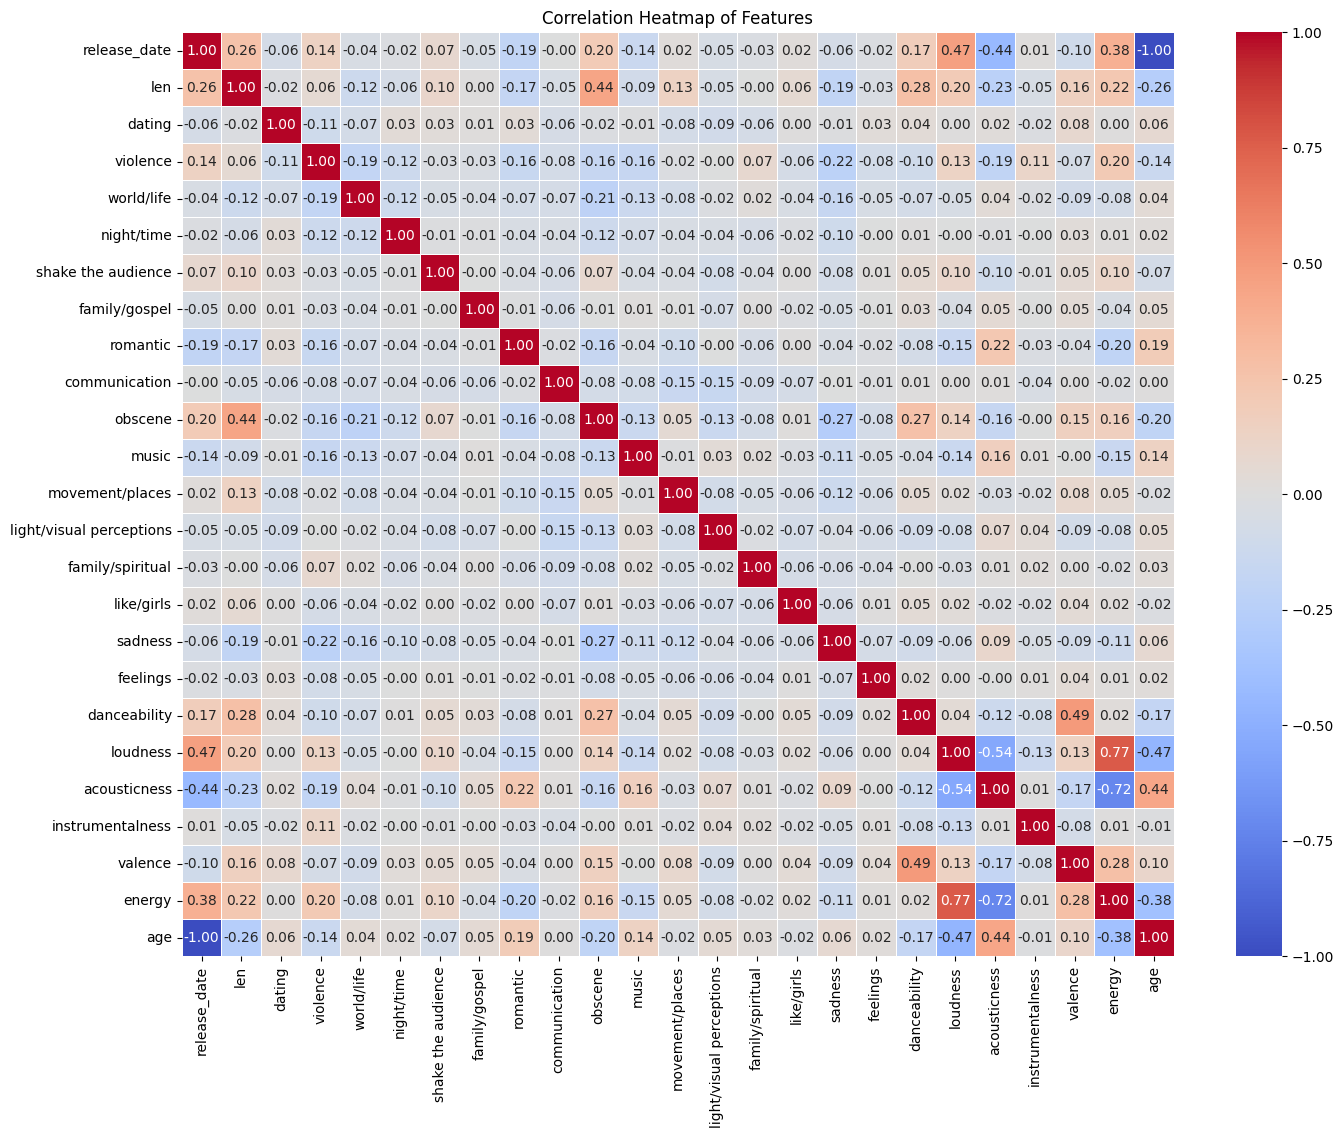

In [28]:
correlation_matrix = metadata.corr(numeric_only = True )
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

The heatmap provides an insightful visualisation that serves as a strong starting point for further exploring observations between data.

**Observations**: There are obvious correlations between related characteristics of songs e.g. energy is quite naturally associated with loudness (the two will often go hand in hand) and so we see a hotter colour there; we see strong correlations (>0.5 and <-0.5 correlation score) between Loudness/Energy, danceabilty/valence, acousticness/energy, acousticness/loudness (inverse relationship). The data then shows a still strong relationship between age/loudness (inverse relationship), age/acousticness (older songs tend to be more acoustic which makes sense due to less development of technology creating electric sounds), and, age/energy (that is older songs tend to have less energy which does fit in with a recognised trend that the pace of life and complexity are both increasing, and therefore the music that reflects the times will mirror these traits in musical form/interpretation.

A **summary of the observations** would say that there is a clear relationship between a song's characteristics and its age: songs have gotten more electronic (less acoustic), are getting shorter in length, songs are getting louder, songs are (as percieved at the point of data collection) getting more energetic as nightlife / club culture evolves. 

From a musician's perspective (my own), this is quite informative. **My own commentary on these observations says** that the use of electronic sounds now is the standard, propelled mainly by use of digital music production softwares and equipment. My hands-on experinece in playing a wide-variety of genres tell me that songs do seem to be getting shorter in general, particularly when one considers the fact that songs recorded years ago would often have been live 
versions which tend to be longer performances. The declining length of songs is also reflective of declining attention spans and demand for shorter-form content. 

Of course I also consider the fact that the data above only visualizes age and different numerical characteristics. I now explore the following non-numerical features of the dataset - 'genre' and 'lyrics' - and choose to ignore the artist_name and track_name for lack of relevance to the exploring how the characteristics of music have changed over time. 

In [47]:
metadata.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic', 'age',
       'processed_lyrics', 'decade'],
      dtype='object')

## Top 20 words by genre

Top 20 words in pop:
know: 9983
like: 8349
time: 6982
come: 6304
feel: 5567
heart: 5551
yeah: 5365
away: 5137
baby: 4511
want: 4423
cause: 4404
to: 4308
life: 4082
night: 3882
leave: 3754
think: 3588
tell: 3581
right: 3435
fall: 3376
need: 3361


Top 20 words in country:
know: 5836
time: 5230
heart: 4864
like: 4569
come: 3900
away: 2923
night: 2838
life: 2781
leave: 2758
long: 2637
to: 2521
feel: 2449
cause: 2413
right: 2329
good: 2293
break: 2276
think: 2193
want: 2125
live: 2073
baby: 2050


Top 20 words in blues:
know: 4959
time: 3945
like: 3699
come: 3677
baby: 3382
feel: 2770
to: 2590
yeah: 2504
away: 2285
night: 2264
heart: 2222
right: 2135
want: 2093
go: 2014
long: 1984
good: 1969
life: 1935
leave: 1877
tell: 1808
live: 1756


Top 20 words in jazz:
like: 4017
know: 3933
time: 3470
come: 2936
feel: 2273
heart: 2227
life: 2218
away: 1864
yeah: 1674
cause: 1550
to: 1542
want: 1513
world: 1487
fall: 1433
right: 1413
dream: 1402
live: 1401
leave: 1370
baby: 1331
think: 1311


Top 20 

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/162877605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


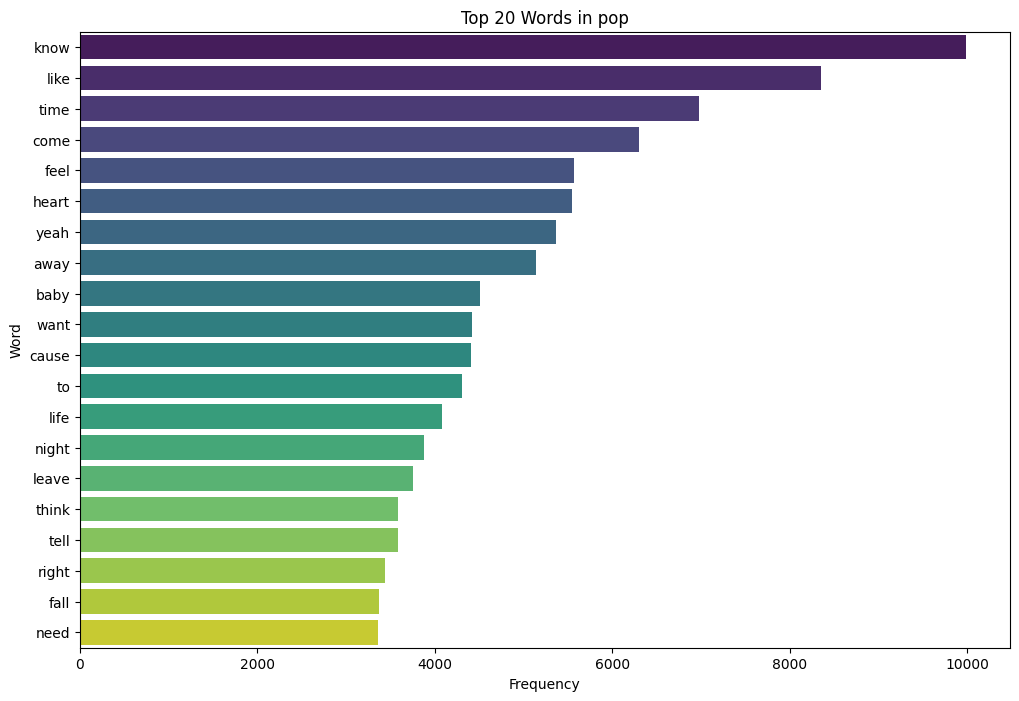

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/162877605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


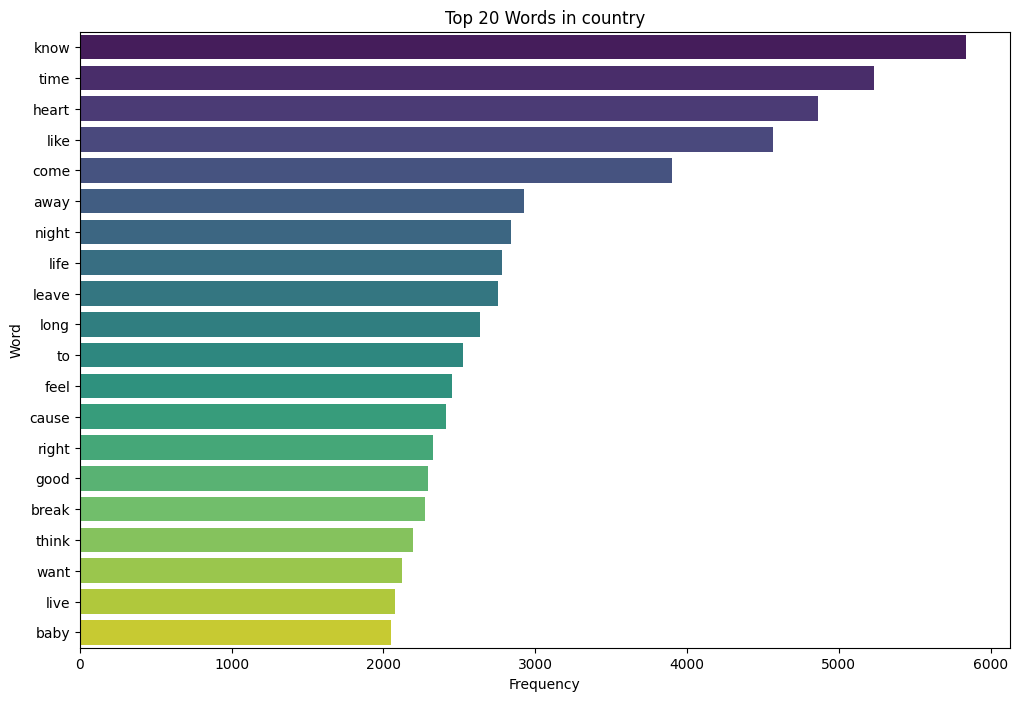

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/162877605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


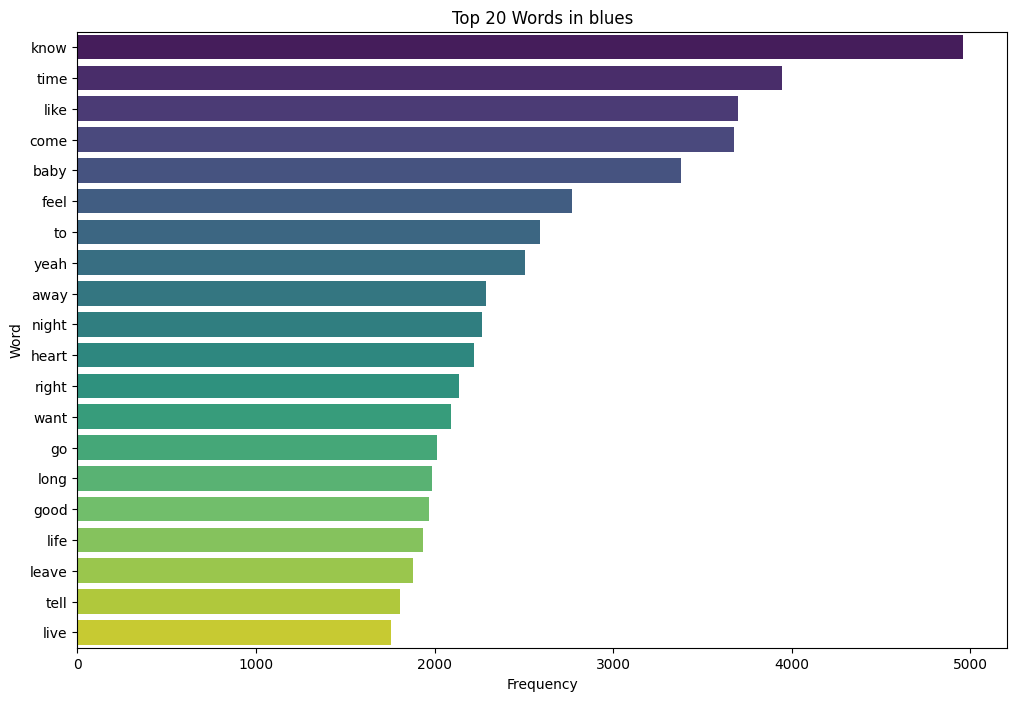

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/162877605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


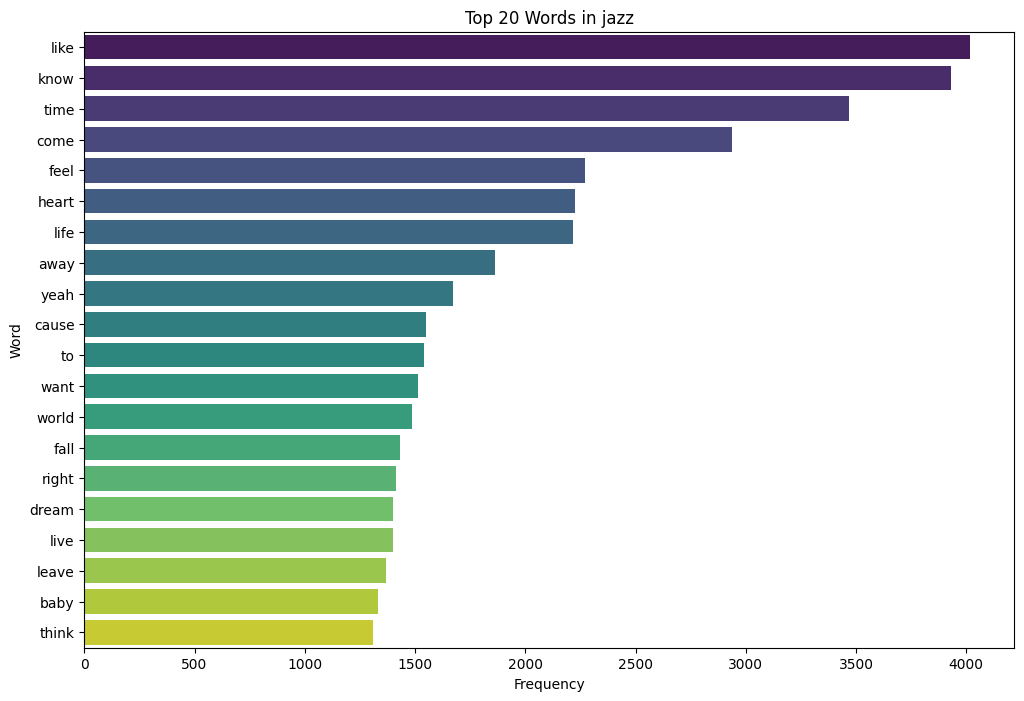

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/162877605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


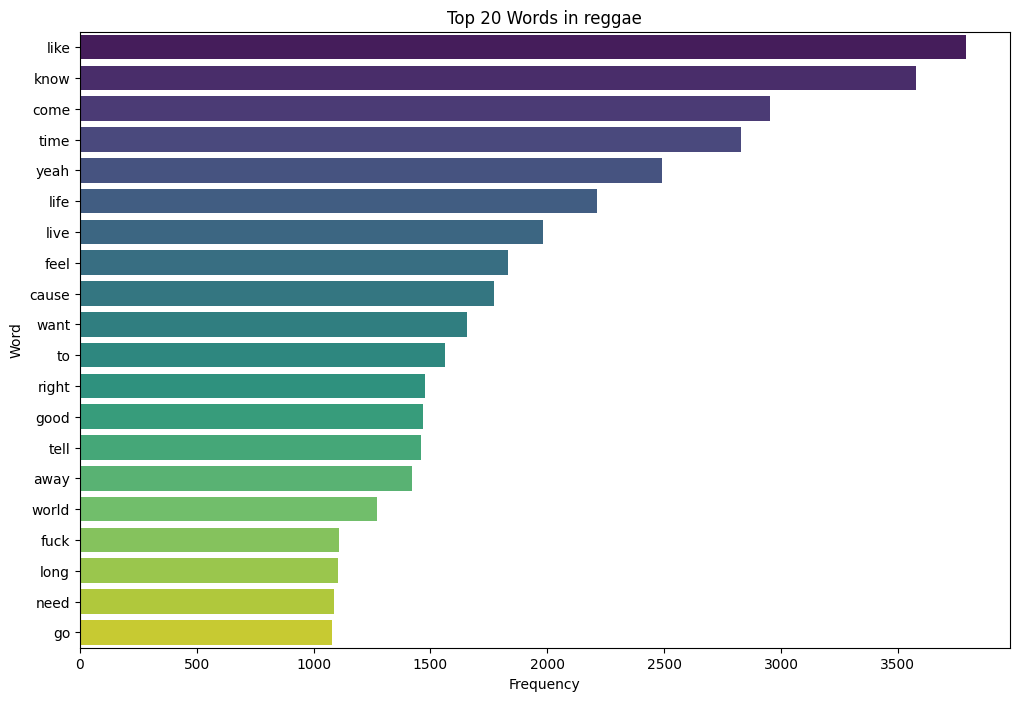

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/162877605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


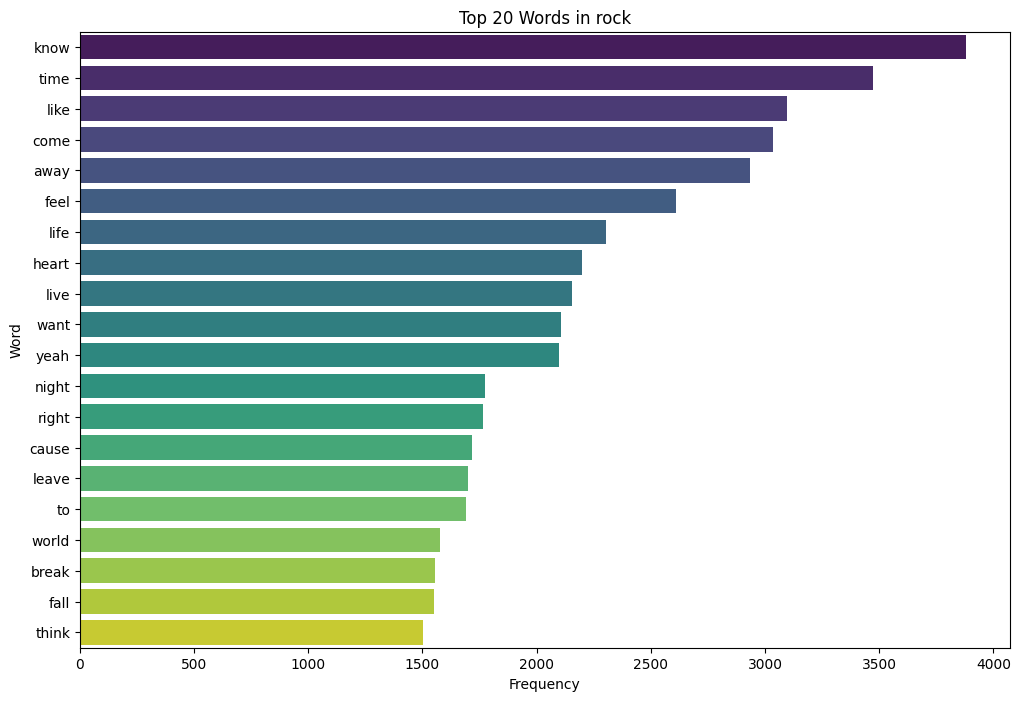

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/162877605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


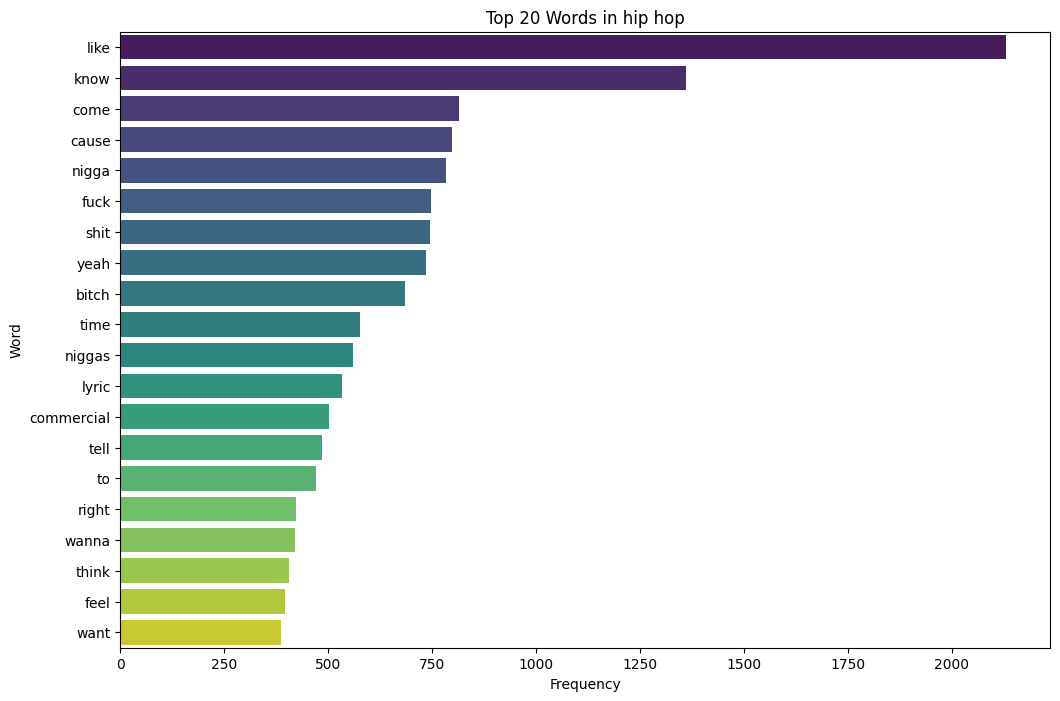

In [38]:
from collections import Counter
import spacy

nlp = spacy.load('en_core_web_md')
nlp.max_length = 20000000

def get_top_n_words_by_genre(metadata, n=20):
    top_words_by_genre = {}
    for genre in metadata['genre'].unique():
        genre_lyrics = ' '.join(metadata[metadata['genre'] == genre]['processed_lyrics'])
        doc = nlp(genre_lyrics)
        words = [token.text for token in doc]
        word_freq = Counter(words)
        top_words_by_genre[genre] = word_freq.most_common(n)
    return top_words_by_genre

top_words_by_genre = get_top_n_words_by_genre(metadata, n=20)

# Displaying the top 20 words for each genre
for genre, words in top_words_by_genre.items():
    print(f"Top 20 words in {genre}:")
    for word, freq in words:
        print(f"{word}: {freq}")
    print("\n")

def plot_top_words_by_genre(metadata, n=20):
    top_words_by_genre = get_top_n_words_by_genre(metadata, n)
    
    for genre, words in top_words_by_genre.items():
        words_df = pd.DataFrame(words, columns=['word', 'frequency'])
        plt.figure(figsize=(12, 8))
        sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')
        plt.title(f'Top {n} Words in {genre}')
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

plot_top_words_by_genre(metadata, n=20)

**Observations**

It is clear from exploring the top 20 words per genre, that the main differences in music are between hip-hop and other genres, with words of profanity occupying almost 50% of the top 20 words in the genre. 
The word "fuck" is also found amongst the top 20 most frequently occuring words in the Reggae genre. 
Genres other than hip-hop have many commonalities in their words and so there is no clear significant difference in lyricysm between these genres.

The explanation behind the trends above is well-documented in music, with hip-hop evolving from protest movements in America; it is no surprise therefore that lyrics are reflective of the sentiment of protest. 

Another key observation that I believe warrants further analysis is that words of profanity i.e curse/swear words (that occupy the top 20 words of genres explored) is that words of profanity exist in genres primarily characterised as "black music" genres (which include R&B, Reggae, Hip-hop, soul, blues, roots). 

## Top 20 words by decade

In [42]:
# Creating a decade column
metadata['decade'] = (metadata['release_date'] // 10) * 10

In [37]:
def get_top_n_words_by_decade(metadata, n=20):
    top_words_by_decade = {}
    for decade in metadata['decade'].unique():
        decade_lyrics = ' '.join(metadata[metadata['decade'] == decade]['processed_lyrics'])
        
        # Splitting text into smaller chunks
        chunks = [decade_lyrics[i:i + 500000] for i in range(0, len(decade_lyrics), 500000)]
        
        words = []
        for chunk in chunks:
            doc = nlp(chunk)
            words.extend([token.text for token in doc])
        
        word_freq = Counter(words)
        top_words_by_decade[decade] = word_freq.most_common(n)
    return top_words_by_decade

top_words_by_decade = get_top_n_words_by_decade(metadata, n=20)

# Display the top 20 words for each decade
for decade, words in top_words_by_decade.items():
    print(f"Top 20 words in {decade}:")
    for word, freq in words:
        print(f"{word}: {freq}")
    print("\n")

Top 20 words in 1950:
know: 1233
heart: 1142
like: 1004
come: 956
time: 932
blue: 654
long: 646
baby: 601
night: 549
leave: 541
dream: 515
feel: 497
tell: 486
away: 481
right: 479
want: 477
kiss: 460
hear: 452
cause: 439
thing: 437


Top 20 words in 1960:
know: 3196
time: 2557
heart: 2479
come: 2476
like: 2191
baby: 2024
away: 1629
night: 1610
long: 1484
life: 1464
feel: 1329
to: 1318
yeah: 1312
tell: 1252
leave: 1235
good: 1223
dream: 1221
want: 1218
right: 1109
world: 1106


Top 20 words in 1970:
know: 4312
time: 3915
come: 3155
like: 2856
feel: 2534
away: 2417
life: 2352
yeah: 1992
baby: 1958
heart: 1887
night: 1885
to: 1881
live: 1867
right: 1794
leave: 1772
good: 1727
long: 1726
want: 1692
world: 1479
tell: 1452


Top 20 words in 1980:
know: 5158
time: 4493
like: 4151
heart: 3917
come: 3770
away: 3198
feel: 2841
night: 2778
to: 2386
life: 2382
want: 2294
live: 2192
baby: 2073
right: 2068
yeah: 2044
long: 1970
leave: 1908
tell: 1884
cause: 1869
world: 1847


Top 20 words in 1990:
k

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/1246780058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


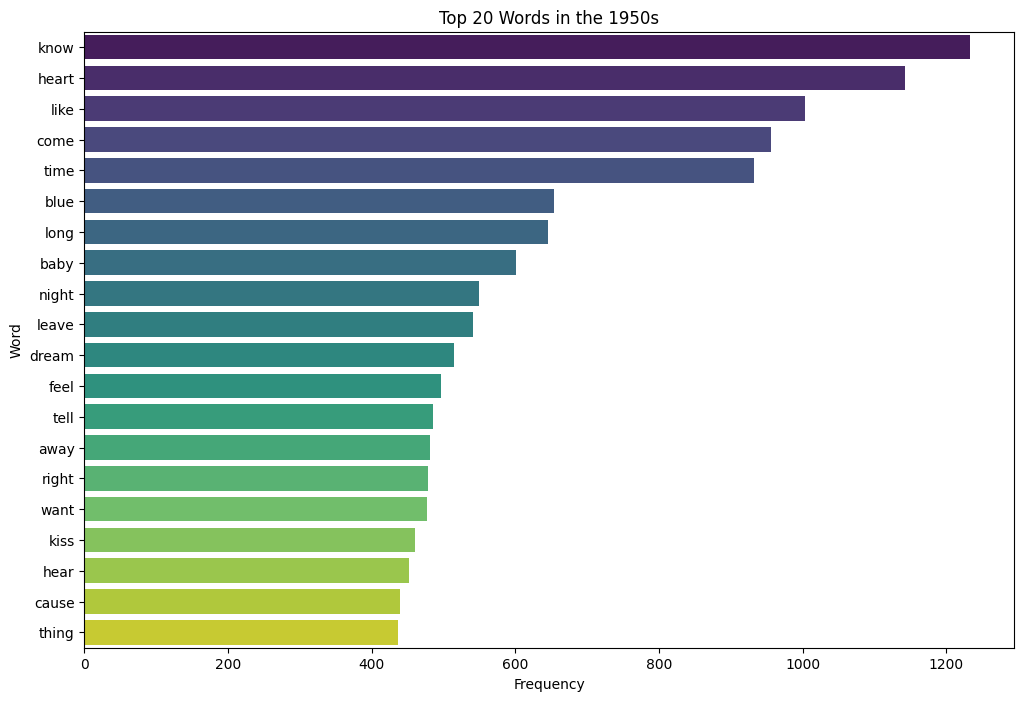

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/1246780058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


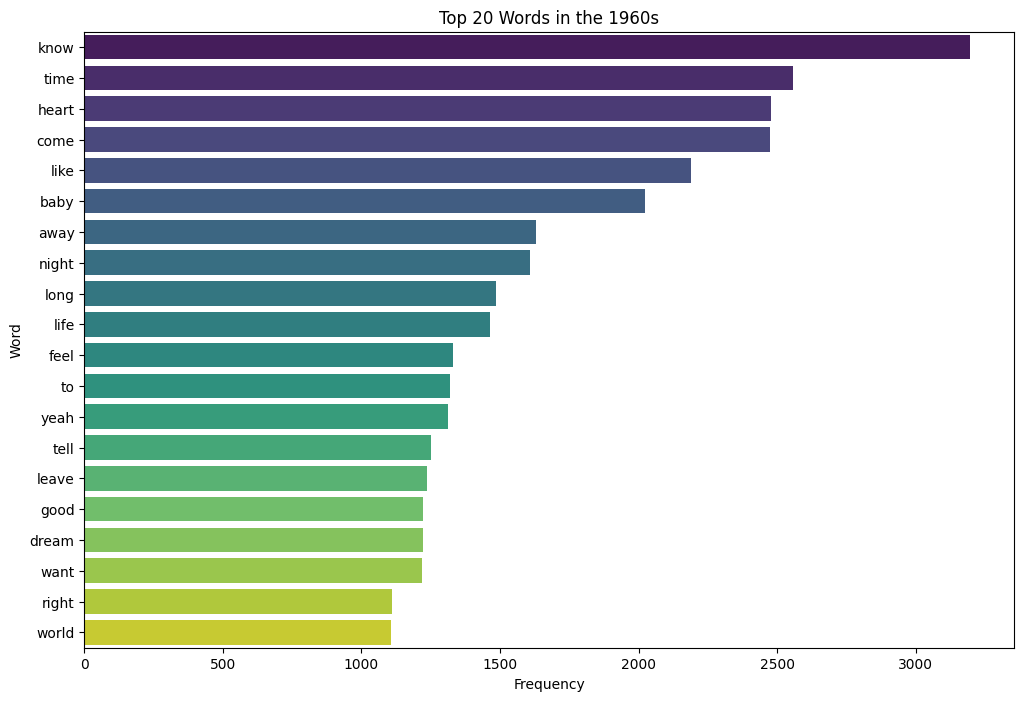

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/1246780058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


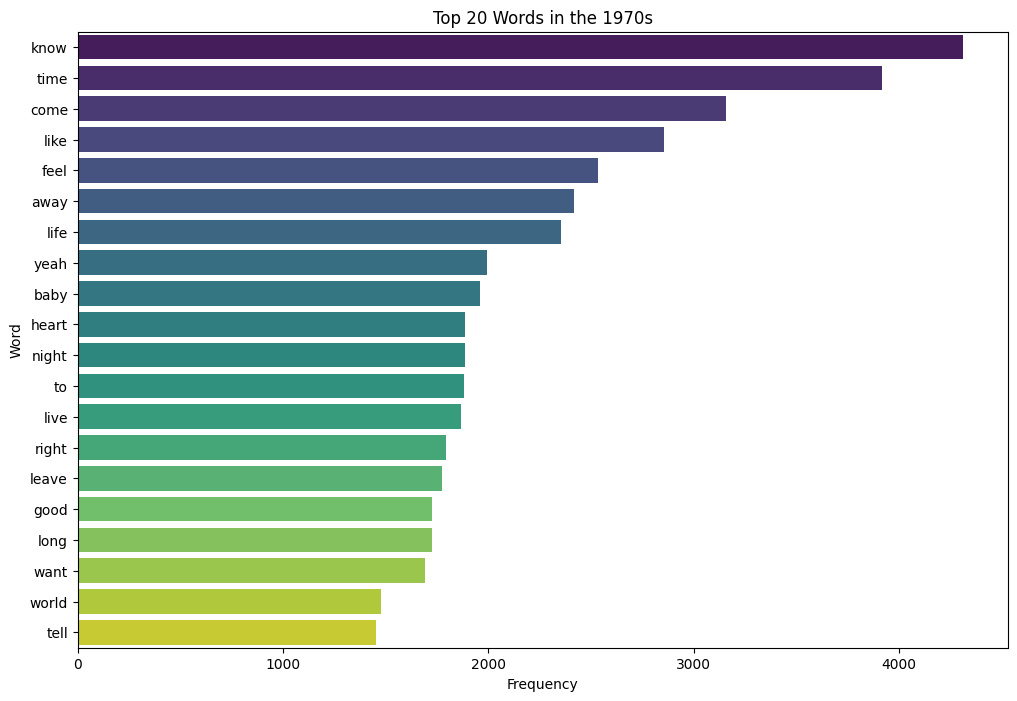

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/1246780058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


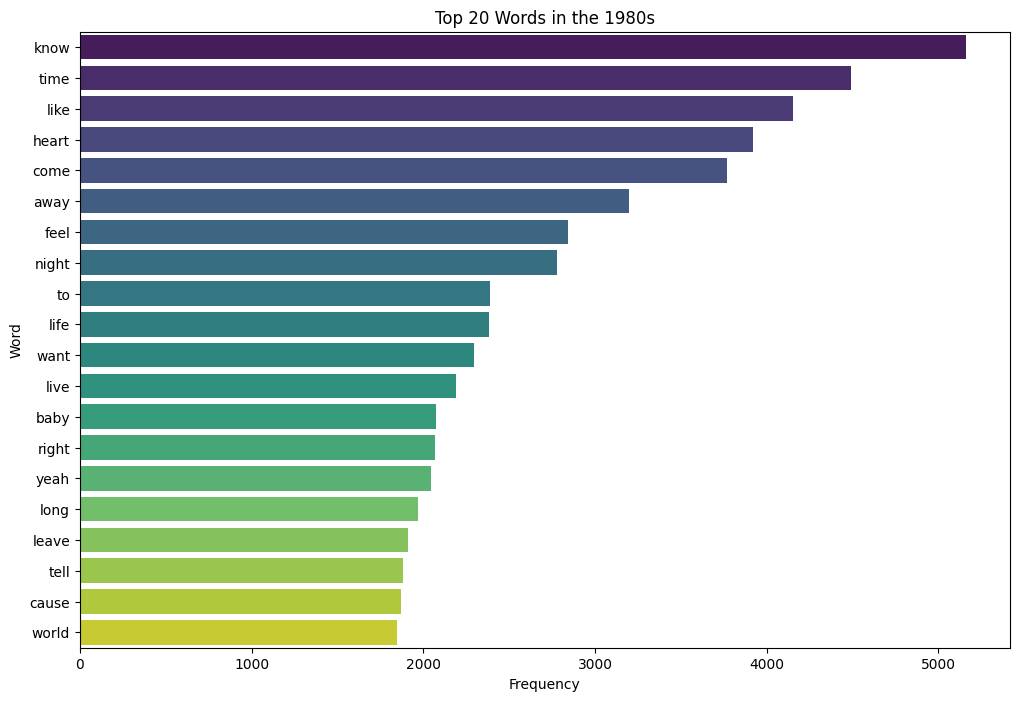

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/1246780058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


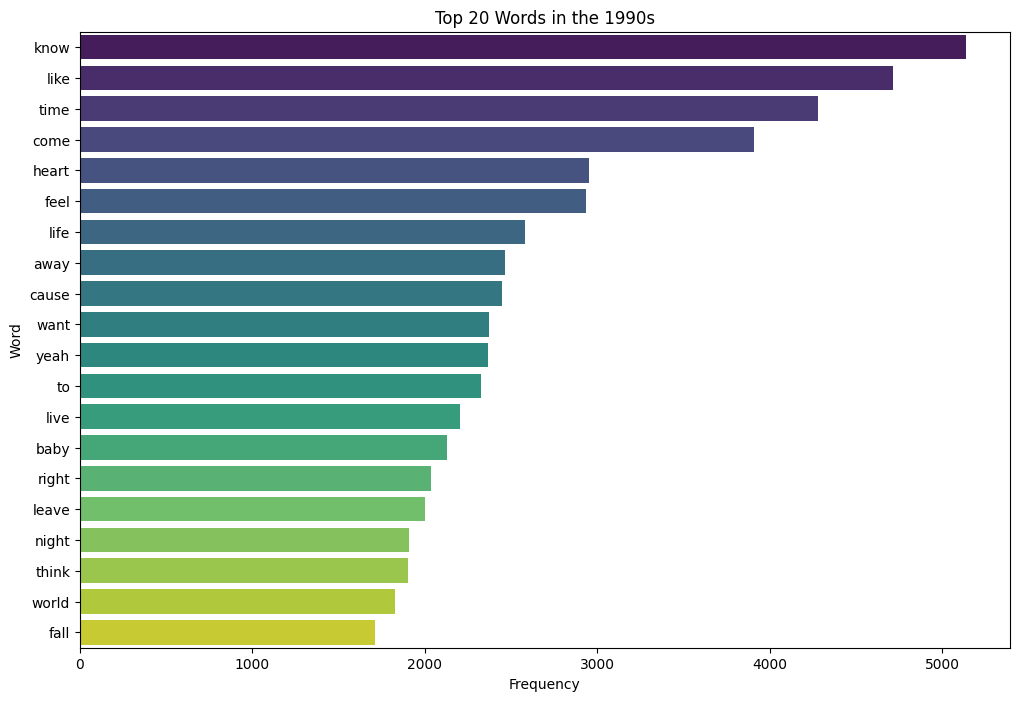

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/1246780058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


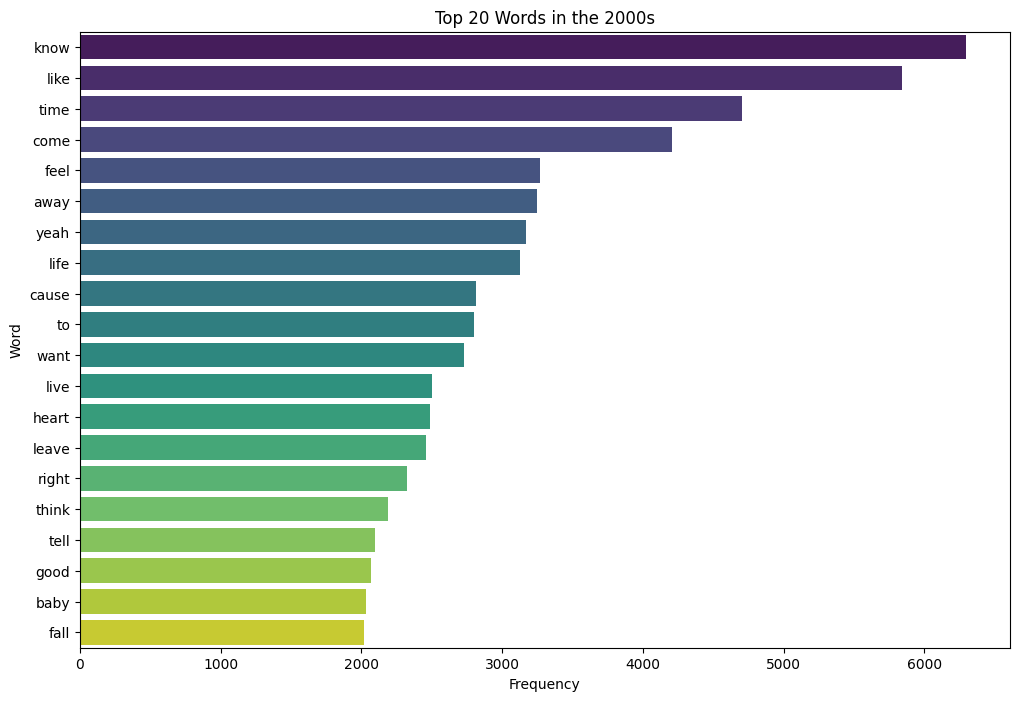

/var/folders/_9/nmhpb6d160375bs6zdcqcr8h0000gn/T/ipykernel_37491/1246780058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')


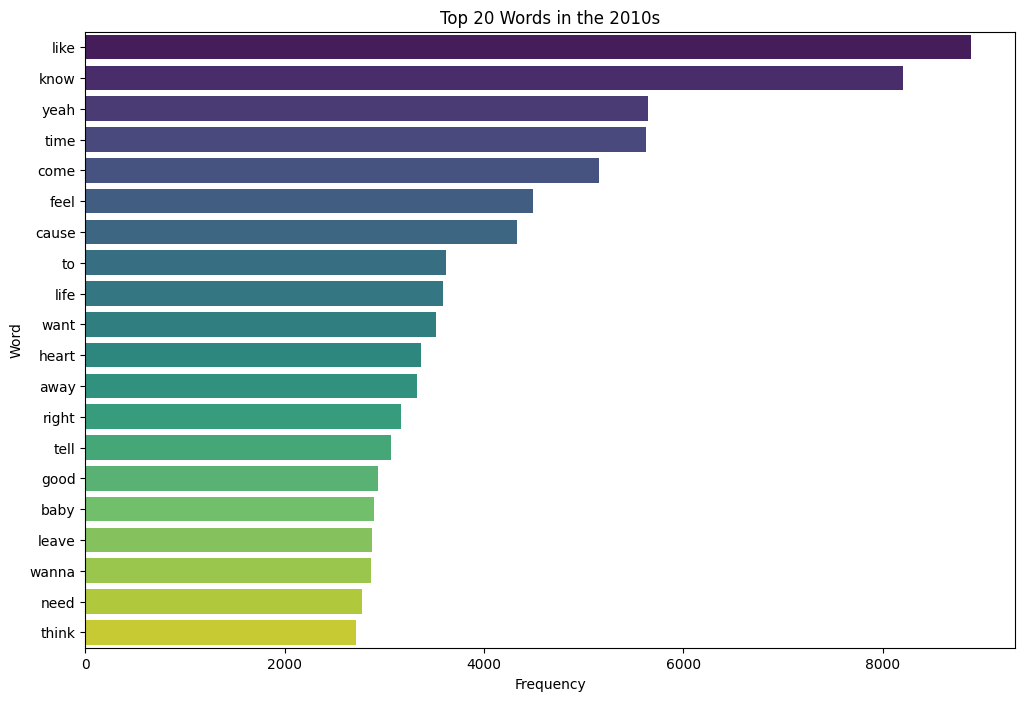

In [39]:
def plot_top_words_by_decade(metadata, n=20):
    top_words_by_decade = get_top_n_words_by_decade(metadata, n)
    
    for decade, words in top_words_by_decade.items():
        words_df = pd.DataFrame(words, columns=['word', 'frequency'])
        plt.figure(figsize=(12, 8))
        sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')
        plt.title(f'Top {n} Words in the {decade}s')
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

plot_top_words_by_decade(metadata, n=20)

In [46]:
metadata.to_csv('../data/processed_metadata.csv')

I see no obvious patterns when looking at top 20 words by decade. 

## Characteristics by Genre

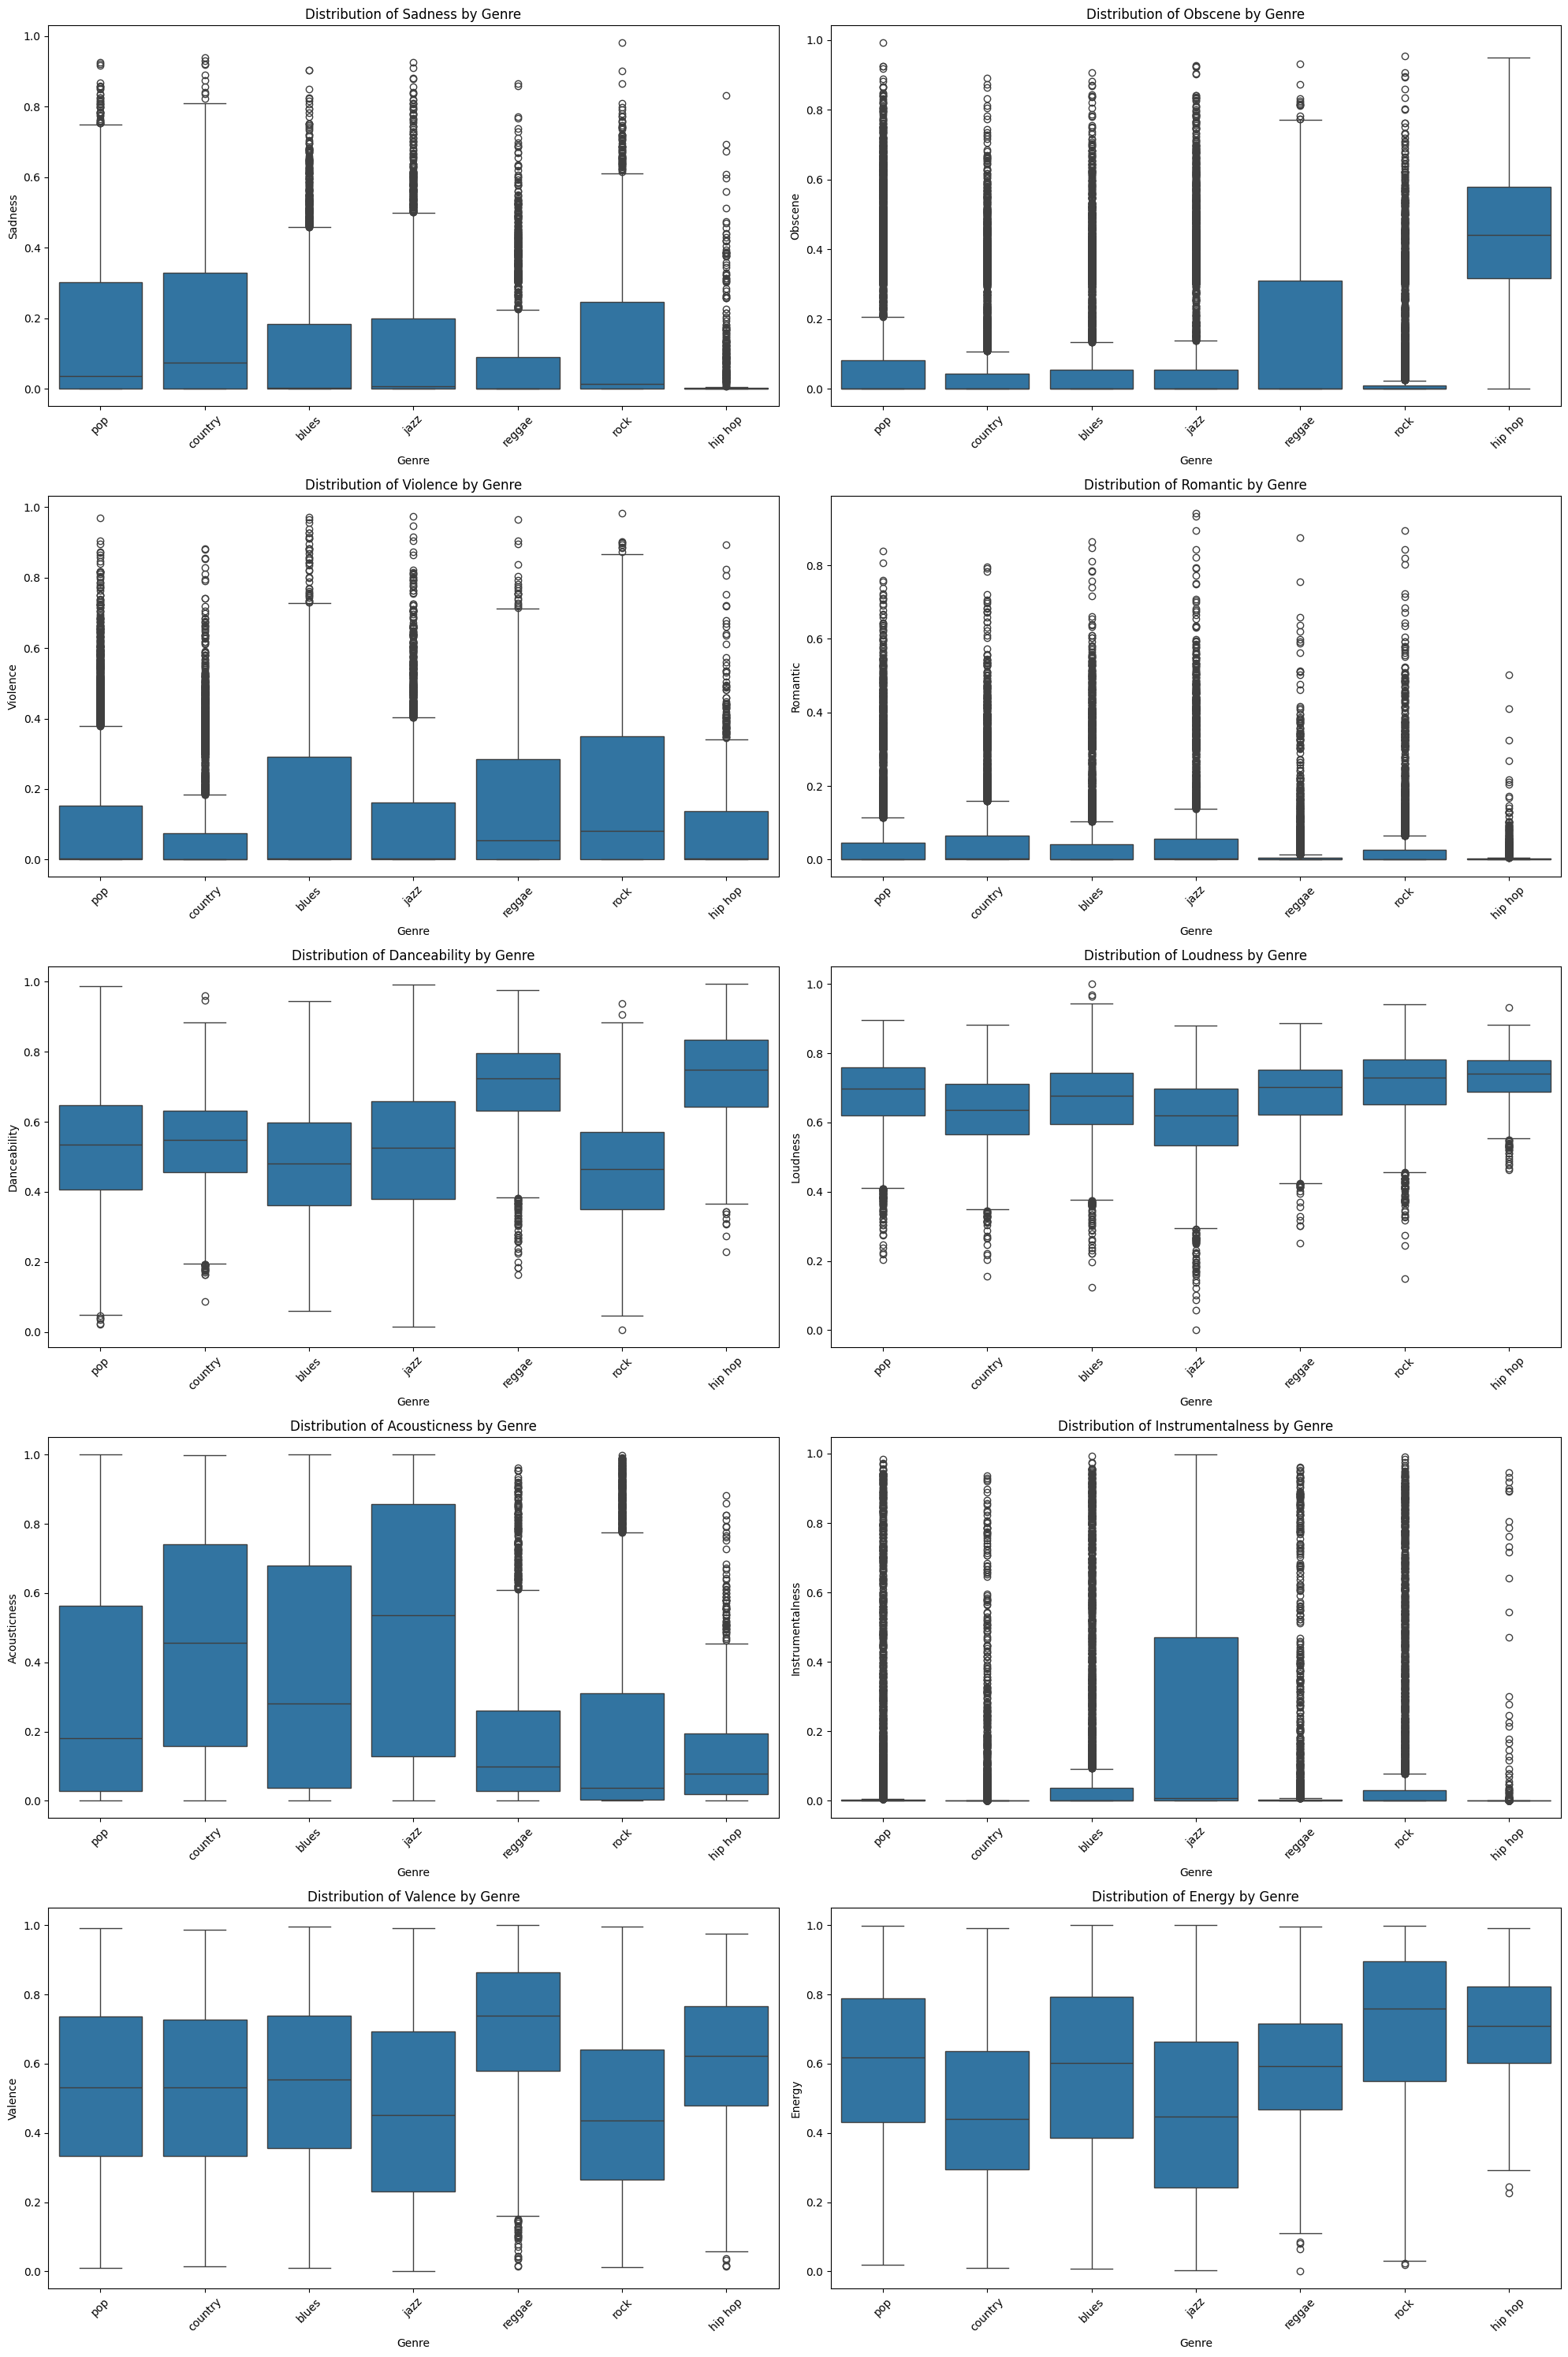

In [48]:
features = ['sadness', 'obscene', 'violence', 'romantic', 'danceability', 
            'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

# Flattening the axes array for iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='genre', y=feature, data=metadata, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature.capitalize()} by Genre')
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel(feature.capitalize())
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

A **Summary** of the observations above - 

Hip-hop has highest scores in characteristics of Obscenity and Danceability / Jazz leads in acousticness and instrumentalness with hip-hop being the lowest of these/ Country leads in sadness / Rock leads in energy and violence. 